# Term project (MNIST visualization)
## Objective
    •Deep neural network 구현 및 Visualization  
    •Visualization을 통한 Neural network에 대한 이해 향상

In [1]:
import torch
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms
from torch.nn import ModuleList

from __future__ import print_function
import time
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

# Dataset

In [2]:
batch_size = 12

train_data = datasets.MNIST('', train=True, transform = transforms.ToTensor())
test_data = datasets.MNIST('', train=False, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)
print(train_loader.dataset.data.shape)
print(test_loader.dataset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [3]:
x = train_data.data.reshape(-1, 784)/255.0
y = train_data.targets
print(x.shape)
print(y.shape)

torch.Size([60000, 784])
torch.Size([60000])


In [4]:
feat_cols= [f'pixel{i}' for i in range(28*28)]
df = pd.DataFrame(x.numpy(), columns=feat_cols)
df['y'] = y.numpy()
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [5]:
df.shape

(60000, 785)

# Input vector PCA and t-SNC

In [6]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df

Explained variation per principal component: [0.09704707 0.07095962]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,pca-one,pca-two
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.485996,-1.226181
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.967488,-1.156281
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,-0.203380,1.537920
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-3.133881,-2.381157
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,-1.501034,2.864899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,-0.390725,-1.150886
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.599005,-2.697648
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,-0.698302,0.627724
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0.512141,-0.021919


In [7]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
rndperm

N =10000
df_subset = df.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Explained variation per principal component: [0.09614986 0.07138532]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.808s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.136576
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.772041
[t-SNE] KL divergence after 300 iterations: 2.827663
t-SNE done! Time elapsed: 14.038899183273315 seconds


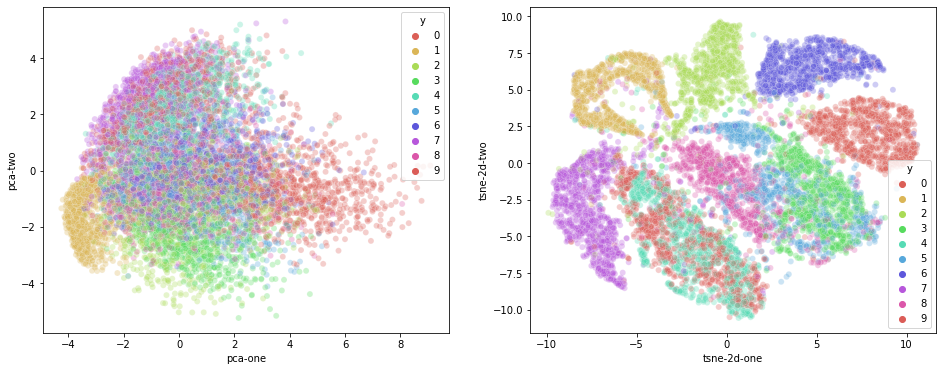

In [8]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.show()

# Model

In [9]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.in_dim = 28*28
        self.out_dim = 10
        
        self.fc1 = nn.Linear(self.in_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, self.out_dim)
        
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()
    
    def forward(self, x):
        a1 = self.relu(self.fc1(x.view(-1, self.in_dim)))
        a2 = self.relu(self.fc2(a1))
        a3 = self.relu(self.fc3(a2))
        a4 = self.relu(self.fc4(a3))
        logit = self.fc5(a4)
        return a1, a2, a3, a4, logit

# Train

In [10]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [11]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        a1, a2, a3, a4, outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if (i+1)%2000 == 0:
            print('[%d, %5d] loss: %.3f' %(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.133
[1,  4000] loss: 0.697
[2,  2000] loss: 0.309
[2,  4000] loss: 0.231
[3,  2000] loss: 0.163
[3,  4000] loss: 0.144
[4,  2000] loss: 0.108
[4,  4000] loss: 0.107
[5,  2000] loss: 0.082
[5,  4000] loss: 0.082
[6,  2000] loss: 0.066
[6,  4000] loss: 0.061
[7,  2000] loss: 0.050
[7,  4000] loss: 0.049
[8,  2000] loss: 0.039
[8,  4000] loss: 0.042
[9,  2000] loss: 0.028
[9,  4000] loss: 0.033
[10,  2000] loss: 0.023
[10,  4000] loss: 0.025
Finished Training


# Hidden layer and Output layer PCA and t-SNE

In [12]:
print(a1.shape)
print(a2.shape)
print(a3.shape)
print(a4.shape)
print(outputs.shape)

torch.Size([12, 512])
torch.Size([12, 256])
torch.Size([12, 128])
torch.Size([12, 64])
torch.Size([12, 10])


In [13]:
troch.max(outputs, 1)

torch.return_types.max(
values=tensor([15.3007, 20.2506, 15.4648, 13.1563, 15.9558, 19.5146, 15.0938, 21.1714,
        18.7127, 24.9501, 19.1733, 17.6358], grad_fn=<MaxBackward0>),
indices=tensor([9, 7, 9, 0, 6, 9, 8, 4, 5, 3, 8, 1]))

In [14]:
x = a1.data
y = torch.max(outputs, 1).indices
print(x)
print(y)
feat_cols= [f'pixel{i}' for i in range(512)]
df = pd.DataFrame(x.numpy(), columns=feat_cols)
df['y'] = y.numpy()
df

tensor([[0.0000, 0.0000, 0.0506,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5674,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1005],
        ...,
        [0.0000, 0.2636, 0.0000,  ..., 0.1475, 0.0000, 0.0440],
        [0.3235, 0.3953, 0.0000,  ..., 0.0000, 0.0648, 0.0000],
        [0.3223, 0.0712, 0.2899,  ..., 0.0000, 0.0000, 0.0266]])
tensor([9, 7, 9, 0, 6, 9, 8, 4, 5, 3, 8, 1])


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel503,pixel504,pixel505,pixel506,pixel507,pixel508,pixel509,pixel510,pixel511,y
0,0.000000,0.000000,0.050616,0.142107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.102817,0.090555,0.000000,0.000000,0.000000,0.316888,0.000000,0.000000,0.000000,9
1,0.000000,0.000000,0.567354,0.362301,0.312728,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.263633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7
2,0.000000,0.000000,0.000000,0.221364,0.168987,0.000000,0.000000,0.000000,0.255259,0.549927,...,0.000000,0.042413,0.146036,0.255758,0.000000,0.000000,0.000000,0.000000,0.100455,9
3,0.000000,0.000000,0.000000,0.030025,0.000000,0.000000,0.387523,0.503948,0.000000,0.947748,...,0.000000,0.000000,0.157367,0.000000,0.073123,0.502202,0.000000,0.000000,0.010544,0
4,0.152186,0.000000,0.000000,0.108747,0.000000,0.139369,0.076148,0.000000,0.000000,0.000000,...,0.240550,0.198455,0.000000,0.000000,0.000000,0.108287,0.000000,0.352364,0.000000,6
5,0.000000,0.000000,0.411102,0.897603,0.567046,0.000000,0.342830,0.000000,0.000000,0.733015,...,0.104719,0.000000,0.000000,0.100954,0.000000,0.567603,0.000000,0.000000,0.000000,9
6,0.386813,0.303452,0.289611,0.181925,0.335114,0.030995,0.000000,0.249905,0.204416,0.000000,...,0.003483,0.176383,0.000000,0.000000,0.000000,0.278462,0.139035,0.000000,0.000000,8
7,0.000000,0.000000,0.176741,0.014844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064721,0.211864,0.000000,0.000000,0.145098,0.000000,0.000000,0.000000,4
8,0.152579,0.000000,0.000000,0.000000,0.049639,0.000000,0.392687,0.000000,0.000000,0.054491,...,0.149477,0.147155,0.000000,0.178795,0.256128,0.572687,0.881510,0.000000,0.000000,5
9,0.000000,0.263591,0.000000,0.038182,0.243535,0.000000,0.000000,0.000000,0.396383,0.000000,...,0.000000,0.000000,0.000000,0.046567,0.000000,0.044324,0.147536,0.000000,0.043965,3


In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df

Explained variation per principal component: [0.24357043 0.15527597]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel505,pixel506,pixel507,pixel508,pixel509,pixel510,pixel511,y,pca-one,pca-two
0,0.000000,0.000000,0.050616,0.142107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.316888,0.000000,0.000000,0.000000,9,2.333557,-1.319265
1,0.000000,0.000000,0.567354,0.362301,0.312728,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7,1.057317,-0.340727
2,0.000000,0.000000,0.000000,0.221364,0.168987,0.000000,0.000000,0.000000,0.255259,0.549927,...,0.146036,0.255758,0.000000,0.000000,0.000000,0.000000,0.100455,9,0.873932,0.304909
3,0.000000,0.000000,0.000000,0.030025,0.000000,0.000000,0.387523,0.503948,0.000000,0.947748,...,0.157367,0.000000,0.073123,0.502202,0.000000,0.000000,0.010544,0,0.125881,4.121654
4,0.152186,0.000000,0.000000,0.108747,0.000000,0.139369,0.076148,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.108287,0.000000,0.352364,0.000000,6,-1.065441,-1.367132
5,0.000000,0.000000,0.411102,0.897603,0.567046,0.000000,0.342830,0.000000,0.000000,0.733015,...,0.000000,0.100954,0.000000,0.567603,0.000000,0.000000,0.000000,9,3.154568,1.148253
6,0.386813,0.303452,0.289611,0.181925,0.335114,0.030995,0.000000,0.249905,0.204416,0.000000,...,0.000000,0.000000,0.000000,0.278462,0.139035,0.000000,0.000000,8,-2.539640,0.258826
7,0.000000,0.000000,0.176741,0.014844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.211864,0.000000,0.000000,0.145098,0.000000,0.000000,0.000000,4,2.821911,-2.055316
8,0.152579,0.000000,0.000000,0.000000,0.049639,0.000000,0.392687,0.000000,0.000000,0.054491,...,0.000000,0.178795,0.256128,0.572687,0.881510,0.000000,0.000000,5,-0.230159,0.824276
9,0.000000,0.263591,0.000000,0.038182,0.243535,0.000000,0.000000,0.000000,0.396383,0.000000,...,0.000000,0.046567,0.000000,0.044324,0.147536,0.000000,0.043965,3,-1.703303,0.823463


In [16]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
rndperm

array([10,  9,  0,  8,  5,  2,  1, 11,  4,  7,  3,  6])

In [17]:
df_subset = df.loc[rndperm[:], :].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df_subset

Explained variation per principal component: [0.24357046 0.15527582]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel505,pixel506,pixel507,pixel508,pixel509,pixel510,pixel511,y,pca-one,pca-two
10,0.323484,0.395347,0.000000,0.000000,0.311641,0.000000,0.000000,0.000000,0.535129,0.000000,...,0.000000,0.430165,0.000000,0.000000,0.000000,0.064848,0.000000,8,-3.001683,-1.056852
9,0.000000,0.263591,0.000000,0.038182,0.243535,0.000000,0.000000,0.000000,0.396383,0.000000,...,0.000000,0.046567,0.000000,0.044324,0.147536,0.000000,0.043965,3,-1.703303,0.823462
0,0.000000,0.000000,0.050616,0.142107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.316888,0.000000,0.000000,0.000000,9,2.333557,-1.319263
8,0.152579,0.000000,0.000000,0.000000,0.049639,0.000000,0.392687,0.000000,0.000000,0.054491,...,0.000000,0.178795,0.256128,0.572687,0.881510,0.000000,0.000000,5,-0.230159,0.824277
5,0.000000,0.000000,0.411102,0.897603,0.567046,0.000000,0.342830,0.000000,0.000000,0.733015,...,0.000000,0.100954,0.000000,0.567603,0.000000,0.000000,0.000000,9,3.154572,1.148253
2,0.000000,0.000000,0.000000,0.221364,0.168987,0.000000,0.000000,0.000000,0.255259,0.549927,...,0.146036,0.255758,0.000000,0.000000,0.000000,0.000000,0.100455,9,0.873932,0.304908
1,0.000000,0.000000,0.567354,0.362301,0.312728,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7,1.057318,-0.340730
11,0.322271,0.071187,0.289901,0.062358,0.195316,0.000000,0.000000,0.002885,0.639117,0.000000,...,0.000000,0.151857,0.000000,0.000000,0.000000,0.000000,0.026573,1,-1.826942,-1.342089
4,0.152186,0.000000,0.000000,0.108747,0.000000,0.139369,0.076148,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.108287,0.000000,0.352364,0.000000,6,-1.065442,-1.367130
7,0.000000,0.000000,0.176741,0.014844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.211864,0.000000,0.000000,0.145098,0.000000,0.000000,0.000000,4,2.821913,-2.055314


In [18]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 11 nearest neighbors...
[t-SNE] Indexed 12 samples in 0.000s...
[t-SNE] Computed neighbors for 12 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 12 / 12
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.796799
[t-SNE] KL divergence after 300 iterations: 0.304422
t-SNE done! Time elapsed: 0.0914459228515625 seconds


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


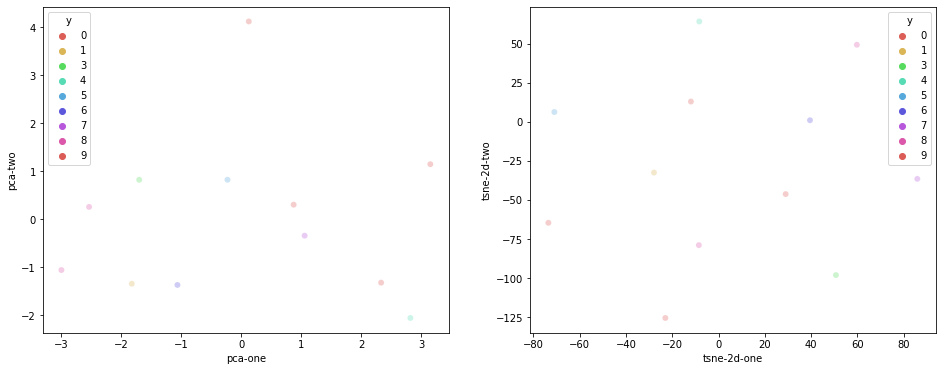

In [19]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.show()

In [20]:
x = a2.data
print(outputs)
torch.max(outputs, 1).indices
print(x)
print(y)
feat_cols= [f'pixel{i}' for i in range(256)]
df = pd.DataFrame(x.numpy(), columns=feat_cols)
df['y'] = y.numpy()
df

tensor([[-7.4054e+00, -3.1605e+00, -4.5915e+00, -3.3418e-03,  7.4024e+00,
          3.5820e-01, -1.1762e+01,  2.2245e+00,  5.3457e+00,  1.5301e+01],
        [-3.0981e+00,  3.8898e+00,  8.3521e+00,  3.8833e+00, -1.9149e+00,
         -1.2801e+01, -1.9981e+01,  2.0251e+01,  2.3557e-01,  5.0252e+00],
        [-8.6015e+00, -9.5020e-01, -4.6442e+00,  3.2887e+00,  5.3288e+00,
          5.8888e-01, -1.5539e+01,  7.0400e+00,  1.6094e+00,  1.5465e+01],
        [ 1.3156e+01, -1.5394e+01,  4.5321e+00, -2.4238e+00, -5.7980e+00,
          1.8332e+00, -1.7937e+00,  1.6809e+00,  6.9747e-01,  5.3148e+00],
        [ 3.7734e+00, -6.1897e+00, -2.8832e-01, -5.0826e+00,  1.9971e+00,
          7.8572e+00,  1.5956e+01, -1.5865e+01,  4.4634e+00, -4.9325e+00],
        [-2.6406e+00, -9.9808e+00,  2.1840e+00,  3.1330e-01,  4.9451e+00,
         -3.5991e+00, -1.7063e+01,  6.8577e+00,  3.9961e+00,  1.9515e+01],
        [-6.6726e+00,  3.5162e+00,  1.5489e+00,  3.8450e+00, -3.6319e+00,
         -2.5877e+00, -4.8988e+0

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,y
0,0.599587,0.609717,0.105917,0.146587,0.514247,0.000000,0.233860,0.013697,0.239493,0.000000,...,0.084637,0.186876,0.852283,0.594883,0.126236,0.000000,0.594096,0.000000,0.429110,9
1,0.075664,0.988401,0.145690,0.000000,0.228089,0.043415,0.451488,0.000000,0.000000,1.007400,...,0.400275,0.000000,0.622863,0.095215,0.143007,0.173933,0.285332,0.166591,0.000000,7
2,0.372301,0.808446,0.174943,0.000000,0.229566,0.000000,0.282429,0.000000,0.012091,0.000000,...,0.106726,0.015987,0.731741,0.463973,0.020807,0.000000,0.424652,0.000000,0.425544,9
3,0.149776,0.202227,0.374102,0.000000,0.491455,0.077218,0.000000,0.000000,0.184979,0.190224,...,0.000000,0.065222,0.262736,0.579306,0.270189,0.916392,0.526584,0.042316,0.000000,0
4,0.393509,0.000000,0.000000,0.000000,0.604825,0.000000,0.040878,0.000000,0.743982,0.000000,...,0.000000,0.358658,0.072078,0.223367,0.167779,0.000000,0.621864,0.634981,0.287019,6
5,0.767027,1.026476,0.044983,0.000000,0.634141,0.196288,0.118940,0.000000,0.058943,0.027220,...,0.135929,0.432157,0.941250,0.789737,0.237043,0.000000,0.657704,0.000000,0.279417,9
6,0.636645,0.000000,0.177951,0.000000,0.139179,0.000000,0.094147,0.008424,0.117341,0.668201,...,0.000000,0.144107,0.010463,0.425391,0.154292,0.120254,0.845793,0.166011,0.367014,8
7,0.546595,0.404691,0.000000,0.061039,0.800493,0.000000,0.107426,0.245170,0.135261,0.000000,...,0.049078,0.689886,1.074672,0.018178,0.006922,0.000000,0.158536,0.501046,0.845569,4
8,0.480743,0.000000,0.585206,0.000000,0.368843,0.000000,0.087044,0.000000,0.502477,0.046075,...,0.057369,0.145088,0.000000,0.690416,0.147099,0.052008,0.621756,0.000000,0.000000,5
9,0.494607,1.010456,0.236669,0.000000,0.000000,0.000000,0.668925,0.198714,0.000000,0.420321,...,0.000000,0.000000,0.000000,0.615137,0.000000,0.000000,0.842184,0.000000,0.067643,3


In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df

Explained variation per principal component: [0.32215106 0.1956973 ]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,y,pca-one,pca-two
0,0.599587,0.609717,0.105917,0.146587,0.514247,0.000000,0.233860,0.013697,0.239493,0.000000,...,0.852283,0.594883,0.126236,0.000000,0.594096,0.000000,0.429110,9,1.745247,0.563729
1,0.075664,0.988401,0.145690,0.000000,0.228089,0.043415,0.451488,0.000000,0.000000,1.007400,...,0.622863,0.095215,0.143007,0.173933,0.285332,0.166591,0.000000,7,1.001708,-2.563253
2,0.372301,0.808446,0.174943,0.000000,0.229566,0.000000,0.282429,0.000000,0.012091,0.000000,...,0.731741,0.463973,0.020807,0.000000,0.424652,0.000000,0.425544,9,1.258425,-0.300977
3,0.149776,0.202227,0.374102,0.000000,0.491455,0.077218,0.000000,0.000000,0.184979,0.190224,...,0.262736,0.579306,0.270189,0.916392,0.526584,0.042316,0.000000,0,0.588241,-0.732136
4,0.393509,0.000000,0.000000,0.000000,0.604825,0.000000,0.040878,0.000000,0.743982,0.000000,...,0.072078,0.223367,0.167779,0.000000,0.621864,0.634981,0.287019,6,-1.352867,2.178496
5,0.767027,1.026476,0.044983,0.000000,0.634141,0.196288,0.118940,0.000000,0.058943,0.027220,...,0.941250,0.789737,0.237043,0.000000,0.657704,0.000000,0.279417,9,3.638278,-0.473641
6,0.636645,0.000000,0.177951,0.000000,0.139179,0.000000,0.094147,0.008424,0.117341,0.668201,...,0.010463,0.425391,0.154292,0.120254,0.845793,0.166011,0.367014,8,-1.542398,-0.130954
7,0.546595,0.404691,0.000000,0.061039,0.800493,0.000000,0.107426,0.245170,0.135261,0.000000,...,1.074672,0.018178,0.006922,0.000000,0.158536,0.501046,0.845569,4,2.123781,2.693207
8,0.480743,0.000000,0.585206,0.000000,0.368843,0.000000,0.087044,0.000000,0.502477,0.046075,...,0.000000,0.690416,0.147099,0.052008,0.621756,0.000000,0.000000,5,-2.139204,0.424352
9,0.494607,1.010456,0.236669,0.000000,0.000000,0.000000,0.668925,0.198714,0.000000,0.420321,...,0.000000,0.615137,0.000000,0.000000,0.842184,0.000000,0.067643,3,-1.428116,-2.349878


In [22]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
rndperm

array([10,  9,  0,  8,  5,  2,  1, 11,  4,  7,  3,  6])

In [23]:
df_subset = df.loc[rndperm[:], :].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df_subset

Explained variation per principal component: [0.32215124 0.19569719]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,y,pca-one,pca-two
10,0.671749,0.000000,0.251822,0.000000,0.254830,0.000000,0.220135,0.000000,0.369026,0.628353,...,0.000000,0.465477,0.055785,0.000000,0.950225,0.000000,0.323549,8,-2.250070,0.281355
9,0.494607,1.010456,0.236669,0.000000,0.000000,0.000000,0.668925,0.198714,0.000000,0.420321,...,0.000000,0.615137,0.000000,0.000000,0.842184,0.000000,0.067643,3,-1.428115,-2.349878
0,0.599587,0.609717,0.105917,0.146587,0.514247,0.000000,0.233860,0.013697,0.239493,0.000000,...,0.852283,0.594883,0.126236,0.000000,0.594096,0.000000,0.429110,9,1.745247,0.563727
8,0.480743,0.000000,0.585206,0.000000,0.368843,0.000000,0.087044,0.000000,0.502477,0.046075,...,0.000000,0.690416,0.147099,0.052008,0.621756,0.000000,0.000000,5,-2.139204,0.424357
5,0.767027,1.026476,0.044983,0.000000,0.634141,0.196288,0.118940,0.000000,0.058943,0.027220,...,0.941250,0.789737,0.237043,0.000000,0.657704,0.000000,0.279417,9,3.638278,-0.473640
2,0.372301,0.808446,0.174943,0.000000,0.229566,0.000000,0.282429,0.000000,0.012091,0.000000,...,0.731741,0.463973,0.020807,0.000000,0.424652,0.000000,0.425544,9,1.258425,-0.300979
1,0.075664,0.988401,0.145690,0.000000,0.228089,0.043415,0.451488,0.000000,0.000000,1.007400,...,0.622863,0.095215,0.143007,0.173933,0.285332,0.166591,0.000000,7,1.001707,-2.563254
11,0.477421,0.189134,0.000000,0.000000,0.266261,0.000000,0.340195,0.097749,0.145182,0.466631,...,0.329274,0.000000,0.060203,0.000000,0.355497,0.389884,0.602264,1,-1.643025,0.409690
4,0.393509,0.000000,0.000000,0.000000,0.604825,0.000000,0.040878,0.000000,0.743982,0.000000,...,0.072078,0.223367,0.167779,0.000000,0.621864,0.634981,0.287019,6,-1.352867,2.178499
7,0.546595,0.404691,0.000000,0.061039,0.800493,0.000000,0.107426,0.245170,0.135261,0.000000,...,1.074672,0.018178,0.006922,0.000000,0.158536,0.501046,0.845569,4,2.123781,2.693201


In [24]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 11 nearest neighbors...
[t-SNE] Indexed 12 samples in 0.000s...
[t-SNE] Computed neighbors for 12 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 12 / 12
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.229252
[t-SNE] KL divergence after 300 iterations: 0.474447
t-SNE done! Time elapsed: 0.06494784355163574 seconds


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


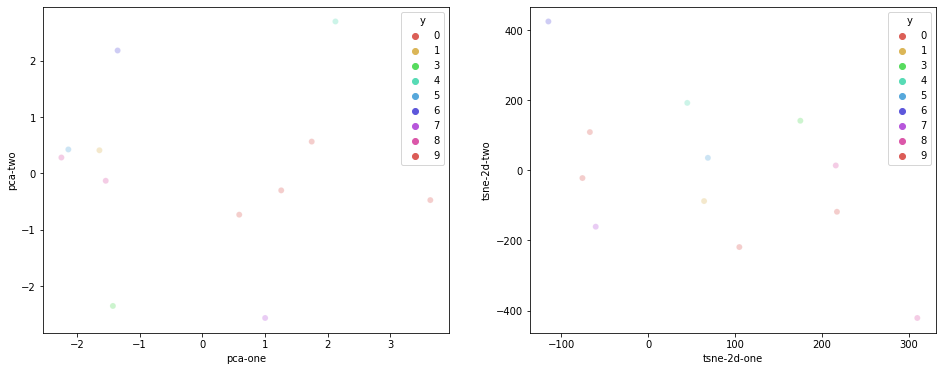

In [25]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.show()

# Test

In [26]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

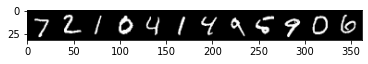

GroundTruth
   7   2   1   0   4   1   4   9   5   9   0   6


TypeError: max() received an invalid combination of arguments - got (tuple, int), but expected one of:
 * (Tensor input)
 * (Tensor input, Tensor other, *, Tensor out)
 * (Tensor input, int dim, bool keepdim, *, tuple of Tensors out)
 * (Tensor input, name dim, bool keepdim, *, tuple of Tensors out)


In [27]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow = batch_size))
print('GroundTruth')
print(" "+' '.join('%3s'% label.item() for label in labels))

outputs = model(images)
_, predicted = torch.max(outputs, 1)
print("Prediction")
print(" "+' '.join('%3s'% label.item() for label in predicted))

In [ ]:
n_predict = 0
n_correct = 0

for data in test_loader:
    inputs, labels = data
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    
    n_predict += len(predicted)
    n_correct += (labels == predicted).sum()
    
print(f"{n_correct}/{n_predict}")
print(f"Accuracy: {n_correct/n_predict:.3f}")